# Circular and elliptical Hough transforms
### Dr. Tirthajyoti Sarkar, Fremont CA 94536
The Hough transform in its simplest form is a method to detect straight lines but it can also be used to detect circles or ellipses. The algorithm assumes that the edge is detected and it is robust against noise or missing points.

### Circle detection
In the following example, the Hough transform is used to detect coin positions and match their edges. We provide a range of plausible radii. For each radius, two circles are extracted and we finally keep the five most prominent candidates. The result shows that coin positions are well-detected.

### Algorithm overview
Given a black circle on a white background, we first guess its radius (or a range of radii) to construct a new circle. This circle is applied on each black pixel of the original picture and the coordinates of this circle are voting in an accumulator. From this geometrical construction, the original circle center position receives the highest score.

Note that the accumulator size is built to be larger than the original picture in order to detect centers outside the frame. Its size is extended by two times the larger radius.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte

### Load picture and detect edges using `canny` filter

In [2]:
image = img_as_ubyte(data.coins()[160:230, 70:270])
edges = canny(image, sigma=3, low_threshold=10, high_threshold=50)

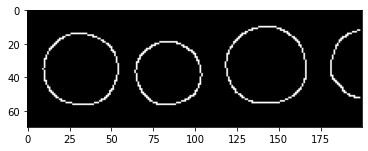

In [3]:
plt.imshow(edges,plt.cm.gray)
plt.show()

### Detect two radii

In [4]:
hough_radii = np.arange(20, 35, 2)
hough_res = hough_circle(edges, hough_radii)

In [5]:
hough_radii

array([20, 22, 24, 26, 28, 30, 32, 34])

### Select the most prominent 5 circles

In [6]:
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,total_num_peaks=3)

### Show

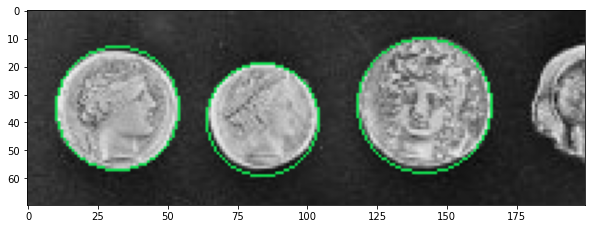

In [7]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
# Converting to grayscale
image = color.gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius)
    # Drawing greenish circles
    image[circy, circx] = (20, 220, 80)

ax.imshow(image, cmap=plt.cm.gray)
plt.show()

### Ellipse detection

In this second example, the aim is to detect the edge of a coffee cup. Basically, this is a projection of a circle, i.e. an ellipse. The problem to solve is much more difficult because five parameters have to be determined, instead of three for circles.

### Algorithm overview

The algorithm takes two different points belonging to the ellipse. It assumes that it is the main axis. A loop on all the other points determines how much an ellipse passes to them. A good match corresponds to high accumulator values.

In [8]:
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter

### Load picture, convert to grayscale and detect edges

In [9]:
image_rgb = data.coffee()[0:220, 160:420]
image_gray = color.rgb2gray(image_rgb)
edges = canny(image_gray, sigma=2.0,
              low_threshold=0.55, high_threshold=0.8)

### Perform a Hough Transform
The accuracy corresponds to the bin size of a major axis. The value is chosen in order to get a single high accumulator. The threshold eliminates low accumulators.

In [10]:
result = hough_ellipse(edges, accuracy=20, threshold=250,min_size=100, max_size=120)
result.sort(order='accumulator')

### Estimated parameters for the ellipse

In [11]:
best = list(result[-1])
yc, xc, a, b = [int(round(x)) for x in best[1:5]]
orientation = best[5]

### Draw the ellipse on the original image

In [12]:
cy, cx = ellipse_perimeter(yc, xc, a, b, orientation)
image_rgb[cy, cx] = (0, 0, 255) # Edge drawn in blue

### Draw the edge (white) and the resulting ellipse (red)

In [13]:
edges = color.gray2rgb(img_as_ubyte(edges))
edges[cy, cx] = (0, 250, 50)

### Show

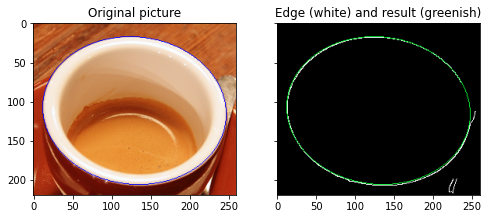

In [14]:
fig2, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(8, 4),
                                sharex=True, sharey=True)

ax1.set_title('Original picture')
ax1.imshow(image_rgb)

ax2.set_title('Edge (white) and result (greenish)')
ax2.imshow(edges)

plt.show()